In [2]:
import json
import numpy as np
from scipy import stats

# Fonction pour lire les données d'un fichier
def read_data(filename):
    with open(filename, 'r') as file:
        matches = [json.loads(line) for line in file]
    return matches

# Analyse pour une saison donnée
def analyze_season(season, matches):
    yellow_cards = [match['yellow_cards'] for match in matches]
    red_cards = [match['red_cards'] for match in matches]
    penalties = [match['penalties'] for match in matches]
    total_cards = [y + r for y, r in zip(yellow_cards, red_cards)]
    
    print(f"Analyse pour la saison {season}:")
    print(f"Moyenne de cartons jaunes: {np.mean(yellow_cards):.2f}")
    print(f"Moyenne de cartons rouges: {np.mean(red_cards):.2f}")
    print(f"Moyenne de cartons (jaunes + rouges): {np.mean(total_cards):.2f}")
    print(f"Moyenne de penaltys: {np.mean(penalties):.2f}")
    print(f"Écart type des cartons jaunes: {np.std(yellow_cards):.2f}")
    print(f"Écart type des cartons rouges: {np.std(red_cards):.2f}")
    print(f"Écart type des penaltys: {np.std(penalties):.2f}")
    
    # Test de normalité (exemple avec les cartons jaunes)
    stat, p = stats.shapiro(yellow_cards)
    alpha = 0.05
    if p > alpha:
        print('Les cartons jaunes suivent une distribution normale (fail to reject H0)')
    else:
        print('Les cartons jaunes ne suivent pas une distribution normale (reject H0)')
    
    print("\n")  # Pour un meilleur affichage

# Analyse pour chaque saison
seasons = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
season_data = {}

for season in seasons:
    matches = read_data(f'ligue1{season}.txt')
    season_data[season] = matches
    analyze_season(season, matches)


Analyse pour la saison 2015:
Moyenne de cartons jaunes: 3.97
Moyenne de cartons rouges: 0.31
Moyenne de cartons (jaunes + rouges): 4.28
Moyenne de penaltys: 0.17
Écart type des cartons jaunes: 1.98
Écart type des cartons rouges: 0.56
Écart type des penaltys: 0.42
Les cartons jaunes ne suivent pas une distribution normale (reject H0)


Analyse pour la saison 2016:
Moyenne de cartons jaunes: 3.54
Moyenne de cartons rouges: 0.25
Moyenne de cartons (jaunes + rouges): 3.80
Moyenne de penaltys: 0.25
Écart type des cartons jaunes: 1.87
Écart type des cartons rouges: 0.51
Écart type des penaltys: 0.50
Les cartons jaunes ne suivent pas une distribution normale (reject H0)


Analyse pour la saison 2017:
Moyenne de cartons jaunes: 3.89
Moyenne de cartons rouges: 0.23
Moyenne de cartons (jaunes + rouges): 4.12
Moyenne de penaltys: 0.26
Écart type des cartons jaunes: 2.02
Écart type des cartons rouges: 0.47
Écart type des penaltys: 0.51
Les cartons jaunes ne suivent pas une distribution normale (re

In [6]:
# Analyse groupée pour les périodes pré-VAR et post-VAR
pre_var_seasons = ['2015', '2016', '2017']
post_var_seasons = ['2018', '2019', '2020']

def analyze_grouped_seasons(name, seasons):
    grouped_matches = []
    for season in seasons:
        grouped_matches.extend(season_data[season])
    
    analyze_season(name, grouped_matches)

print("Analyse groupée pour la période pré-VAR:")
analyze_grouped_seasons("Pré-VAR", pre_var_seasons)

print("Analyse groupée pour la période post-VAR:")
analyze_grouped_seasons("Post-VAR", post_var_seasons)


Analyse groupée pour la période pré-VAR:
Analyse pour la saison Pré-VAR:
Moyenne de cartons jaunes: 3.79
Moyenne de cartons rouges: 0.26
Moyenne de cartons (jaunes + rouges): 4.06
Moyenne de penaltys: 0.23
Écart type des cartons jaunes: 1.96
Écart type des cartons rouges: 0.52
Écart type des penaltys: 0.48
Les cartons jaunes ne suivent pas une distribution normale (reject H0)


Analyse groupée pour la période post-VAR:
Analyse pour la saison Post-VAR:
Moyenne de cartons jaunes: 3.79
Moyenne de cartons rouges: 0.26
Moyenne de cartons (jaunes + rouges): 4.06
Moyenne de penaltys: 0.29
Écart type des cartons jaunes: 1.89
Écart type des cartons rouges: 0.56
Écart type des penaltys: 0.53
Les cartons jaunes ne suivent pas une distribution normale (reject H0)




# Analyse Exploratoire des données

In [13]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [18]:
# Initialisation d'une liste vide pour stocker les données de tous les fichiers
data = []

# Chargement des données pour les années 2015 à 2021
for year in range(2015, 2020):
    filename = f'ligue1{year}.txt'
    with open(filename, 'r') as file:
        for line in file:
            match_data = json.loads(line)
            match_data['year'] = year  # Ajout de l'année au dictionnaire
            data.append(match_data)

# Création d'un DataFrame à partir des données chargées
df = pd.DataFrame(data)

# Affichage des premières lignes pour confirmer le chargement
df.head()


,match_id,home_team,away_team,yellow_cards,red_cards,penalties,year
0,185545,Paris Saint Germain,Paris Saint Germain,7,1,0,2015
1,185546,Guingamp,Nantes,5,0,0,2015
2,185547,Angers,Angers,5,0,0,2015
3,185548,Nice,Nice,6,1,0,2015
4,185549,Caen,Marseille,1,0,0,2015


In [19]:
# Ajout d'une colonne pour l'indication pre-VAR ou post-VAR
df['period'] = df['year'].apply(lambda x: 'post-VAR' if x >= 2018 else 'pre-VAR')

# Vérification de valeurs manquantes
print(df.isnull().sum())

# Vérification des types de données
print(df.dtypes)

# Affichage des premières lignes pour confirmer le prétraitement
df.head()


match_id        0
home_team       0
away_team       0
yellow_cards    0
red_cards       0
penalties       0
year            0
period          0
dtype: int64
match_id         int64
home_team       object
away_team       object
yellow_cards     int64
red_cards        int64
penalties        int64
year             int64
period          object
dtype: object


,match_id,home_team,away_team,yellow_cards,red_cards,penalties,year,period
0,185545,Paris Saint Germain,Paris Saint Germain,7,1,0,2015,pre-VAR
1,185546,Guingamp,Nantes,5,0,0,2015,pre-VAR
2,185547,Angers,Angers,5,0,0,2015,pre-VAR
3,185548,Nice,Nice,6,1,0,2015,pre-VAR
4,185549,Caen,Marseille,1,0,0,2015,pre-VAR


In [20]:
# Groupement des données par période
grouped_data = df.groupby('period').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'penalties': 'sum'
}).reset_index()

# Affichage des fréquences totales pour chaque période
grouped_data


,period,yellow_cards,red_cards,penalties
0,post-VAR,2461,170,167
1,pre-VAR,4421,305,267


In [21]:
# Calcul des moyennes par match pour chaque type de carton et penalties
df['yellow_cards_pm'] = df.groupby('year')['yellow_cards'].transform('mean')
df['red_cards_pm'] = df.groupby('year')['red_cards'].transform('mean')
df['penalties_pm'] = df.groupby('year')['penalties'].transform('mean')

# Groupement des données par période pour les moyennes
grouped_data_pm = df.groupby('period').agg({
    'yellow_cards_pm': 'mean',
    'red_cards_pm': 'mean',
    'penalties_pm': 'mean'
}).reset_index()

# Affichage des moyennes normalisées pour chaque période
grouped_data_pm


,period,yellow_cards_pm,red_cards_pm,penalties_pm
0,post-VAR,3.734446,0.257967,0.253414
1,pre-VAR,3.794850,0.261803,0.229185


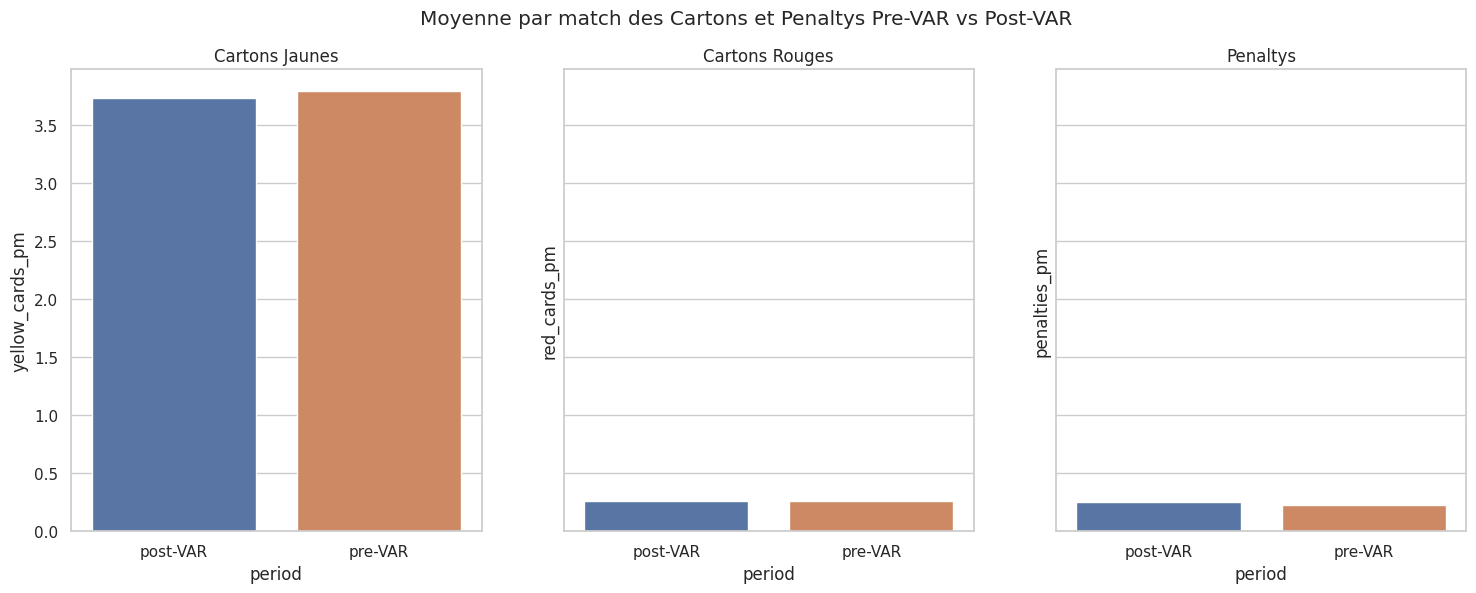

In [22]:
# Mise en place des paramètres de visualisation
sns.set(style="whitegrid")

# Création des graphiques pour chaque type de donnée
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Moyenne par match des Cartons et Penaltys Pre-VAR vs Post-VAR')

# Cartons jaunes
sns.barplot(x='period', y='yellow_cards_pm', data=grouped_data_pm, ax=axes[0])
axes[0].set_title('Cartons Jaunes')

# Cartons rouges
sns.barplot(x='period', y='red_cards_pm', data=grouped_data_pm, ax=axes[1])
axes[1].set_title('Cartons Rouges')

# Penalties
sns.barplot(x='period', y='penalties_pm', data=grouped_data_pm, ax=axes[2])
axes[2].set_title('Penaltys')

plt.show()


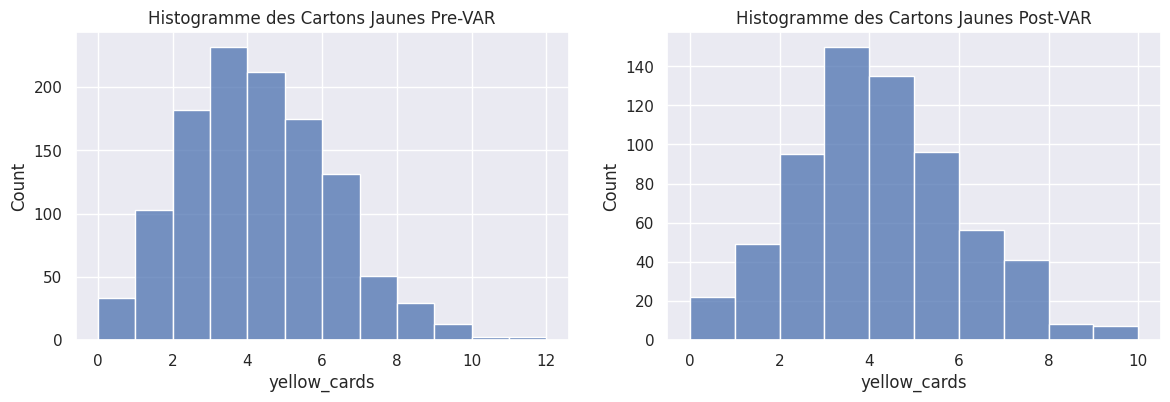

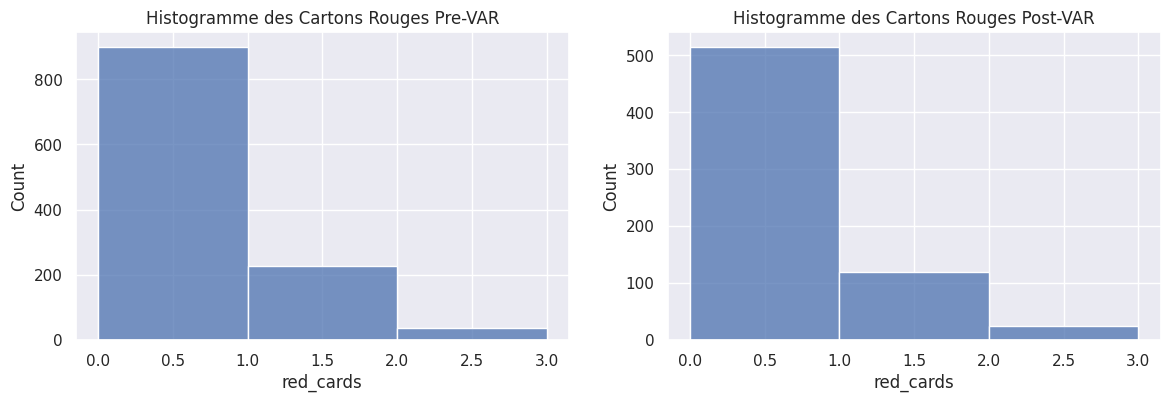

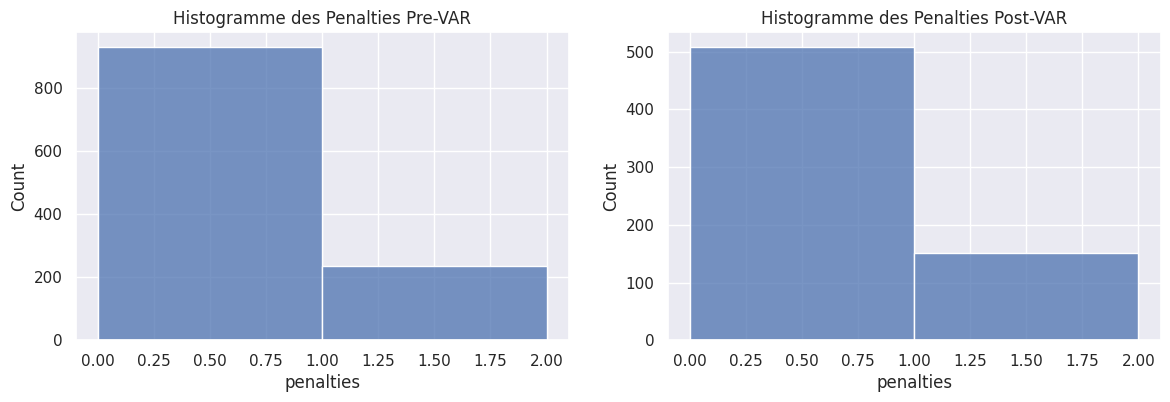

In [24]:
# Paramètres de visualisation
sns.set(style="darkgrid")

# Préparation des données
pre_var_data = df[df['period'] == 'pre-VAR']
post_var_data = df[df['period'] == 'post-VAR']

# Histogramme pour les cartons jaunes
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(pre_var_data['yellow_cards'], kde=False, bins=range(0, pre_var_data['yellow_cards'].max() + 1))
plt.title('Histogramme des Cartons Jaunes Pre-VAR')
plt.subplot(1, 2, 2)
sns.histplot(post_var_data['yellow_cards'], kde=False, bins=range(0, post_var_data['yellow_cards'].max() + 1))
plt.title('Histogramme des Cartons Jaunes Post-VAR')
plt.show()

# Histogramme pour les cartons rouges
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(pre_var_data['red_cards'], kde=False, bins=range(0, pre_var_data['red_cards'].max() + 1))
plt.title('Histogramme des Cartons Rouges Pre-VAR')
plt.subplot(1, 2, 2)
sns.histplot(post_var_data['red_cards'], kde=False, bins=range(0, post_var_data['red_cards'].max() + 1))
plt.title('Histogramme des Cartons Rouges Post-VAR')
plt.show()

# Histogramme pour les penaltys
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(pre_var_data['penalties'], kde=False, bins=range(0, pre_var_data['penalties'].max() + 1))
plt.title('Histogramme des Penalties Pre-VAR')
plt.subplot(1, 2, 2)
sns.histplot(post_var_data['penalties'], kde=False, bins=range(0, post_var_data['penalties'].max() + 1))
plt.title('Histogramme des Penalties Post-VAR')
plt.show()


In [23]:
# Nous pouvons commencer par le test de normalité pour les cartons jaunes pre-VAR
stats.shapiro(df[df['period'] == 'pre-VAR']['yellow_cards'])

# Ce test peut être répété pour les cartons rouges et les penaltys, ainsi que pour la période post-VAR.


ShapiroResult(statistic=0.9656776785850525, pvalue=5.808810074251327e-16)

In [25]:
from scipy.stats import kstest

# Normalisation des données pour tenir compte des différentes tailles d'échantillons
# Cela nous permet de comparer la densité par match plutôt que les totaux absolus
pre_var_norm = {
    'yellow_cards': pre_var_data['yellow_cards'] / len(pre_var_data),
    'red_cards': pre_var_data['red_cards'] / len(pre_var_data),
    'penalties': pre_var_data['penalties'] / len(pre_var_data)
}

post_var_norm = {
    'yellow_cards': post_var_data['yellow_cards'] / len(post_var_data),
    'red_cards': post_var_data['red_cards'] / len(post_var_data),
    'penalties': post_var_data['penalties'] / len(post_var_data)
}

# Test de Kolmogorov-Smirnov pour comparer les distributions
ks_results = {}
for event in ['yellow_cards', 'red_cards', 'penalties']:
    ks_stat, ks_pvalue = kstest(pre_var_norm[event], post_var_norm[event])
    ks_results[event] = {'statistic': ks_stat, 'pvalue': ks_pvalue}

# Afficher les résultats
for event, result in ks_results.items():
    print(f"Test de Kolmogorov-Smirnov pour {event}:")
    print(f"  Statistique: {result['statistic']}")
    print(f"  P-value: {result['pvalue']}\n")


Test de Kolmogorov-Smirnov pour yellow_cards:
  Statistique: 0.5523950321399962
  P-value: 7.95311726300303e-119

Test de Kolmogorov-Smirnov pour red_cards:
  Statistique: 0.18589487257973128
  P-value: 3.3859924336473897e-13

Test de Kolmogorov-Smirnov pour penalties:
  Statistique: 0.2016672419519756
  P-value: 1.82313299354922e-15



In [27]:
from scipy.stats import poisson, chisquare

# Fonction pour tester l'ajustement de Poisson pour les données pré-VAR et post-VAR
def test_poisson_fit(data):
    # Calcul de la moyenne pour la loi de Poisson
    lambda_ = np.mean(data)
    
    # Fréquences observées
    values, observed_freqs = np.unique(data, return_counts=True)
    
    # Fréquences attendues selon la loi de Poisson
    expected_freqs = [len(data) * poisson.pmf(k, lambda_) for k in values]
    
    # Normalisation des fréquences attendues pour qu'elles aient la même somme que les fréquences observées
    expected_freqs = [freq * (sum(observed_freqs) / sum(expected_freqs)) for freq in expected_freqs]
    
    # Test du chi-carré
    chi_stat, chi_pvalue = chisquare(observed_freqs, f_exp=expected_freqs)
    
    return chi_stat, chi_pvalue

# Test pour les cartons jaunes, rouges, et penaltys pré-VAR
print("Pré-VAR:")
for event in ['yellow_cards', 'red_cards', 'penalties']:
    stat, pvalue = test_poisson_fit(pre_var_data[event])
    print(f"{event.capitalize()} - Chi-square stat: {stat}, p-value: {pvalue}")

# Test pour les cartons jaunes, rouges, et penaltys post-VAR
print("\nPost-VAR:")
for event in ['yellow_cards', 'red_cards', 'penalties']:
    stat, pvalue = test_poisson_fit(post_var_data[event])
    print(f"{event.capitalize()} - Chi-square stat: {stat}, p-value: {pvalue}")


Pré-VAR:
Yellow_cards - Chi-square stat: 11.19504344806704, p-value: 0.5122815846481403
Red_cards - Chi-square stat: 1.3454001576652936, p-value: 0.7183816188732716
Penalties - Chi-square stat: 2.8328410344672417, p-value: 0.2425807784083954

Post-VAR:
Yellow_cards - Chi-square stat: 14.124035261064673, p-value: 0.16740878989370392
Red_cards - Chi-square stat: 2.7596902780722044, p-value: 0.43017867306578006
Penalties - Chi-square stat: 0.2542959110865966, p-value: 0.8806033728076526
